In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
from pickle import load
import pickle

## Loading in Cpx data from Pkl

In [3]:
with open(r'../Combo_Cpx.pkl', 'rb') as f:
            All_Cpx=load(f)
Adams_Cpx=All_Cpx.loc[All_Cpx['Volcano']=="Adams"]
Adams_Cpx['Sample_ID_Cpx']="Adams"

C:\Users\penny\AppData\Local\Temp\ipykernel_25396\4009078991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_Cpx['Sample_ID_Cpx']="Adams"


In [4]:
print(len(Adams_Cpx))

1214


In [5]:
WangCopy=Adams_Cpx.copy()
WangCopy['Preferred_P']=WangCopy['P_Wang21_eq1']
WangCopy['Model']="Wang"
JorgensonCopy=Adams_Cpx.copy()
JorgensonCopy['Preferred_P']=JorgensonCopy['P_Jorgenson22']
JorgensonCopy['Model']="Jorgenson"

Combo_Cpx=pd.concat([WangCopy, JorgensonCopy], axis=0)

## Choose Crustal density

In [6]:
rho=2700
P_axis_min=-3
P_axis_max=12
D_axis_min=100000*P_axis_min/(9.8*rho)
D_axis_max=100000*P_axis_max/(9.8*rho)


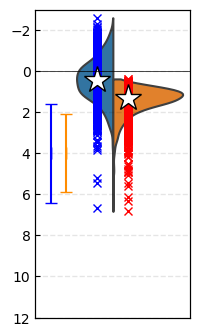

In [22]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()

volc_order=["Adams"]
sns.violinplot(x="Sample_ID_Cpx", y="Preferred_P",  cut=0,  inner=None, hue="Model",
            data=Combo_Cpx, split=True, ax=ax1, width=0.9, order=volc_order, stick=True)

# This bit plots an x for every measurement
ax1.plot(-0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Adams")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Adams")],  
         'xb')

ax1.plot(0.1+0*Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Adams")],
      Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Adams")],  
         'xr')

# This plots the star at the median of each one
ax1.plot(-0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Adams")]),  
         '*k', mfc='w', ms=20)

ax1.plot(0.1,
      np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Adams")]),  
         '*k', mfc='w', ms=20)


ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.get_legend().remove()
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax2.set_yticks([])
ax1.set_xticks([])
ax1.errorbar(-0.4, 4, xerr=0, yerr=2.4,  ecolor='blue', elinewidth=1.5, fmt='none', capsize=4, mec='k')
ax1.errorbar(-0.3, 4, xerr=0, yerr=1.9,  ecolor='darkorange', elinewidth=1.5, fmt='none', capsize=4, mec='k')


fig.savefig('Adams_Cpx.png', dpi=200)

In [8]:
np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Jorgenson")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Adams")])

1.3338805970149252

In [9]:
np.nanmedian(Combo_Cpx['Preferred_P'].loc[(Combo_Cpx['Model']=="Wang")
                                        &(Combo_Cpx["Sample_ID_Cpx"]=="Adams")])

0.440049962744844

(array([323., 541., 210.,  83.,  31.,  13.,   5.,   4.,   2.,   2.]),
 array([0.38012438, 1.02508806, 1.67005174, 2.31501542, 2.9599791 ,
        3.60494279, 4.24990647, 4.89487015, 5.53983383, 6.18479751,
        6.82976119]),
 <BarContainer object of 10 artists>)

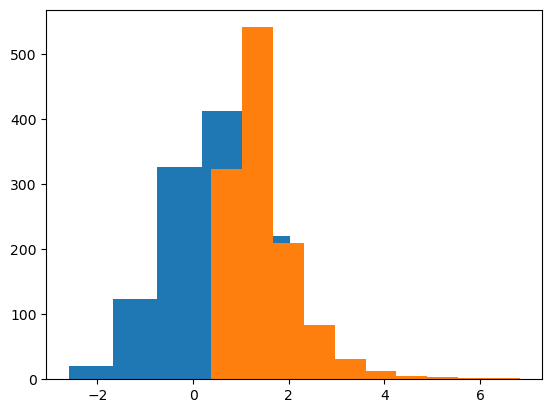

In [10]:
plt.hist(WangCopy['Preferred_P'])
plt.hist(JorgensonCopy['Preferred_P'])

In [11]:
len(Combo_Cpx)/2

1214.0

In [12]:
sum(Adams_Cpx['Jd_from 0=Na, 1=Al']==0)

271

In [13]:
sum(Adams_Cpx['Jd_from 0=Na, 1=Al']==1)

943

## Load in LP data

In [14]:
LPs=pd.read_excel(r'../Geophysics_April23.xlsx',
                  sheet_name="LPEarthquakes")

In [15]:
# No Adams LPS
LPs.Volcano.unique()

array(['Lassen', 'Medicine Lake', 'Three sisters', 'Crater Lake',
       'Mount Baker', 'Glacier Peak', 'Mount Rainier'], dtype=object)

## Raw template for geophysics and Exp Pet

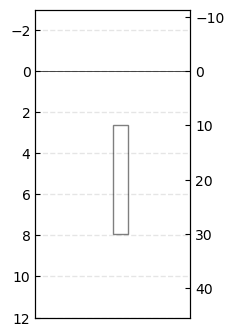

In [16]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()
from matplotlib import patches
elev=3.7432 # Elevation of mt adams in km

sep=0.5

## Magnetotelluric data 
# Hill et al. (2009)
# rect_H1 = patches.Rectangle((10*sep,3+elev),0.2,25-10,linewidth=1,
#                             edgecolor='k',facecolor='blue', alpha=1)
# ax2.add_patch(rect_H1)
rect_Reg = patches.Rectangle((10*sep,10),0.2,30-10,linewidth=1,
                             edgecolor='k',facecolor='None', alpha=0.5)
ax2.add_patch(rect_Reg)

ax1.plot([-1, 8], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax1.set_xlim([4, 6])
ax1.set_xlabel(None)
ax1.set_ylabel(None)
ax1.set_xticks([])
#ax1.set_xticklabels(['Exp Pet', 'Exp Pet', 'MT', 'Seismics'], rotation=90)
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
                 
fig.savefig('Geophysical+Other_Adams.png', dpi=200, bbox_inches="tight")

## Loading in amphibole data

C:\Users\penny\AppData\Local\Temp\ipykernel_25396\61696603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_Amp['Sample_ID_Amp']="Adams"
C:\Users\penny\AppData\Local\Temp\ipykernel_25396\61696603.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Adams_Amp_Filt['Sample_ID_Amp']="Adams"
C:\Users\penny\AppData\Local\Temp\ipykernel_25396\61696603.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



30
30


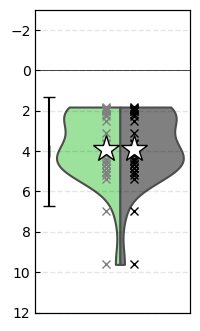

In [26]:

with open(r'../Combo_Amp.pkl', 'rb') as f:
            All_Amp=load(f)
Adams_Amp=All_Amp.loc[All_Amp['Volcano']=="Adams"]
Adams_Amp['Sample_ID_Amp']="Adams"

with open(r'../Combo_Amp_Filt.pkl', 'rb') as f:
            All_Amp_Filt=load(f)
Adams_Amp_Filt=All_Amp_Filt.loc[All_Amp_Filt['Volcano']=="Adams"]
Adams_Amp_Filt['Sample_ID_Amp']="Adams"
Adams_Amp['Class']='Unfilt'
Adams_Amp_Filt['Class']='filt'

Combo_Amp=pd.concat([Adams_Amp_Filt, Adams_Amp], axis=0)

print(sum(Adams_Amp['P_kbar_calc']>-10))
print(sum(Adams_Amp_Filt['P_kbar_calc']>-10))

import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,3.93), sharey=True)
ax2 = ax1.twinx()


# ax = sns.violinplot(y=Adams_Amp['P_Ridolfi21'],
#                 inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)
sns.violinplot(x="Volcano", y="P_Ridolfi21",  cut=0,  inner=None, hue="Class",
            data=Combo_Amp, split=True, ax=ax1, width=0.9,  palette=['lightgreen', 'grey'],
               stick=True)


ax1.plot(-0.1+0*Adams_Amp_Filt['P_Ridolfi21'],
  Adams_Amp_Filt['P_Ridolfi21'],
         'x', mec='grey')
ax1.plot(+0.1+0*Adams_Amp['P_Ridolfi21'],
  Adams_Amp['P_Ridolfi21'],
         'x', mec='black')

ax1.plot(-0.1,
  np.nanmedian(Adams_Amp_Filt['P_Ridolfi21']),
         '*k', mfc='w', ms=20)

ax1.plot(+0.1,
  np.nanmedian(Adams_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)
ax1.get_legend().remove()
ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.6, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)
ax1.errorbar(-0.5, 4, xerr=0, yerr=2.7,  ecolor='black', elinewidth=1.5, ms=0, capsize=4, mec='k')


fig.savefig('Adams_Amp.png', dpi=200)

In [18]:
np.nanmedian(Adams_Amp_Filt['P_Ridolfi21'])

3.8824323375500995

In [19]:
print(len(Adams_Amp['P_kbar_calc']>-20))

43


In [20]:
All_Amp['Volcano'].unique()

array(['Baker', 'Rainier', 'MSH', 'Adams', 'Hood', 'CraterLake',
       'Jefferson', 'MedicineLake', 'Lassen'], dtype=object)

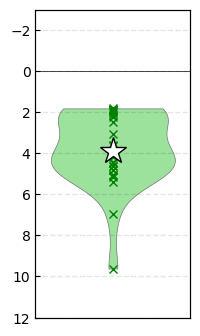

In [21]:
import seaborn as sns
fig, (ax1) = plt.subplots(1, 1, figsize=(2,4), sharey=True)
ax2 = ax1.twinx()


ax = sns.violinplot(y=Adams_Amp['P_Ridolfi21'],
                inner=None, cut=0, ax=ax1, color="lightgreen", linewidth=0.5)


ax1.plot(0*Adams_Amp['P_Ridolfi21'],
  Adams_Amp['P_Ridolfi21'],
         'x', mec='green')

ax1.plot(0,
  np.nanmedian(Adams_Amp['P_Ridolfi21']),
         '*k', mfc='w', ms=20)

ax1.plot([-1, 5], [0, 0], '-k', lw=0.5)
ax1.set_ylim([P_axis_max, P_axis_min])
ax2.set_ylim([D_axis_max, D_axis_min])
ax1.set_xlim([-0.5, 0.5])
ax1.set_xlabel(None)
ax1.set_ylabel(None)

ax1.tick_params(direction="in")
ax2.tick_params(direction="in")
ax2.set_yticks([])
ax1.set_xticks([])
ax1.grid(color = 'k', linestyle = '--', axis='y',linewidth = 1, alpha = 0.1, zorder=0)


fig.savefig('Adams_Amp.png', dpi=200)